In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import json
from PIL import Image

labels_path = Path("/lhome/mathiawo/miniproj/datasets/tdt17/notest/RDD2022_COMBINED/labels")
images_path = Path("/lhome/mathiawo/miniproj/datasets/tdt17/notest/RDD2022_COMBINED/images")

In [3]:
res = {
    "D00_total": 0,
    "D00_width_gte_height": 0,
    "D00_height_gt_width": 0,
    "D10_total": 0,
    "D10_width_gte_height": 0,
    "D10_height_gt_width": 0,
}

aspect_ratios = {
    "D00": [],
    "D10": [],
}



for label_file in labels_path.glob("*.txt"):
    image_file = images_path / (label_file.stem + ".jpg")
    image = Image.open(image_file)
    image_width, image_height = image.size

    with open(label_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            label, x_center, y_center, width, height = line.split()
            x_center = float(x_center)
            y_center = float(y_center)
            width = float(width)
            height = float(height)

            width = width * image_width
            height = height * image_height


            if label == "0":
                res["D00_total"] += 1
                if width >= height:
                    res["D00_width_gte_height"] += 1
                else:
                    res["D00_height_gt_width"] += 1

                aspect_ratios["D00"].append(width / height)

            elif label == "1":
                res["D10_total"] += 1
                if width >= height:
                    res["D10_width_gte_height"] += 1
                else:
                    res["D10_height_gt_width"] += 1

                aspect_ratios["D10"].append(width / height)

In [4]:
print(json.dumps(res, indent=4))

{
    "D00_total": 25999,
    "D00_width_gte_height": 7710,
    "D00_height_gt_width": 18289,
    "D10_total": 11826,
    "D10_width_gte_height": 11760,
    "D10_height_gt_width": 66
}


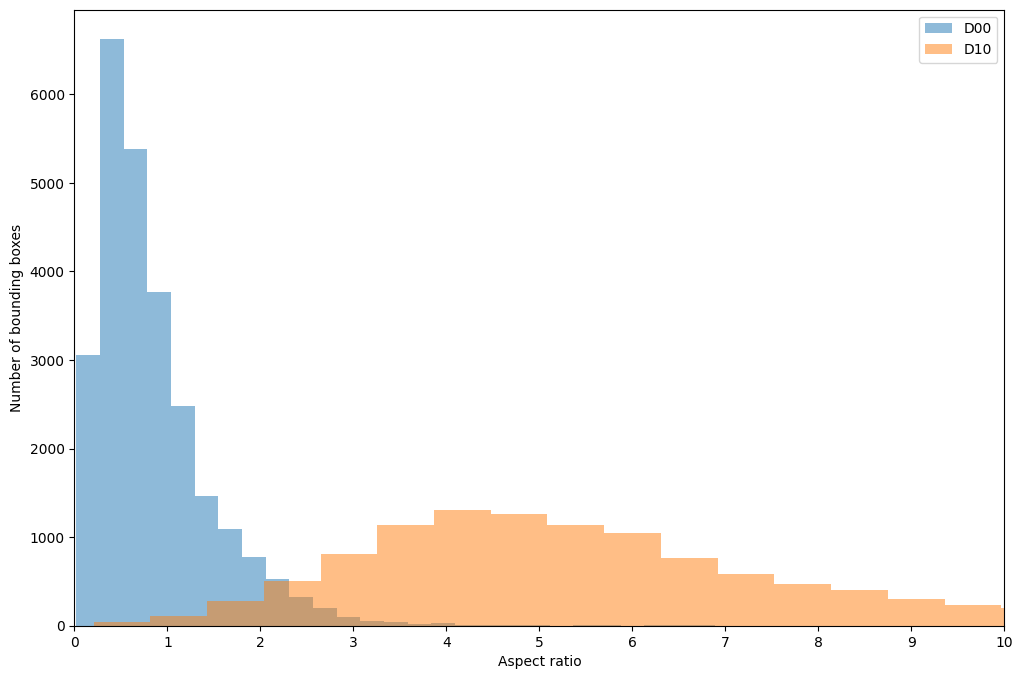

In [5]:
# plot aspect ratios
plt.figure(figsize=(12, 8))
plt.hist(aspect_ratios["D00"], bins=100, alpha=0.5, label="D00")
plt.hist(aspect_ratios["D10"], bins=100, alpha=0.5, label="D10")
plt.legend(loc="upper right")
plt.xlim(0, 10)
plt.xticks(range(0, 11))
plt.xlabel("Aspect ratio")
plt.ylabel("Number of bounding boxes")

plt.show()

In [6]:
max_d00_aspect_ratio = max(aspect_ratios["D00"])
print(max_d00_aspect_ratio)

25.464285714285715


In [9]:
number_of_pixels_per_country = {
    "Norway": 0,
    "Japan": 0,
    "United_States": 0,
    "China_MotorBike": 0,
    "China_Drone": 0,
    "Czech": 0,
    "India": 0,
}

norway_sizes = {}

for image_file in images_path.glob("*.jpg"):
    image = Image.open(image_file)

    if "Norway" in image_file.name:
        str_size = str(image.size)
        if not str_size in norway_sizes:
            norway_sizes[str_size] = 0
        norway_sizes[str_size] += 1
        
    
    image_width, image_height = image.size
    number_of_pixels_per_country[image_file.stem.rsplit("_", 1)[-2]] += image_width * image_height

print(json.dumps(number_of_pixels_per_country, indent=4))

{
    "Norway": 64116263848,
    "Japan": 3913606272,
    "United_States": 1968128000,
    "China_MotorBike": 518258688,
    "China_Drone": 629407744,
    "Czech": 1018440000,
    "India": 3994790400
}


In [10]:
norway_sizes

{'(3650, 2044)': 923, '(4040, 2035)': 4342, '(3643, 2041)': 2896}

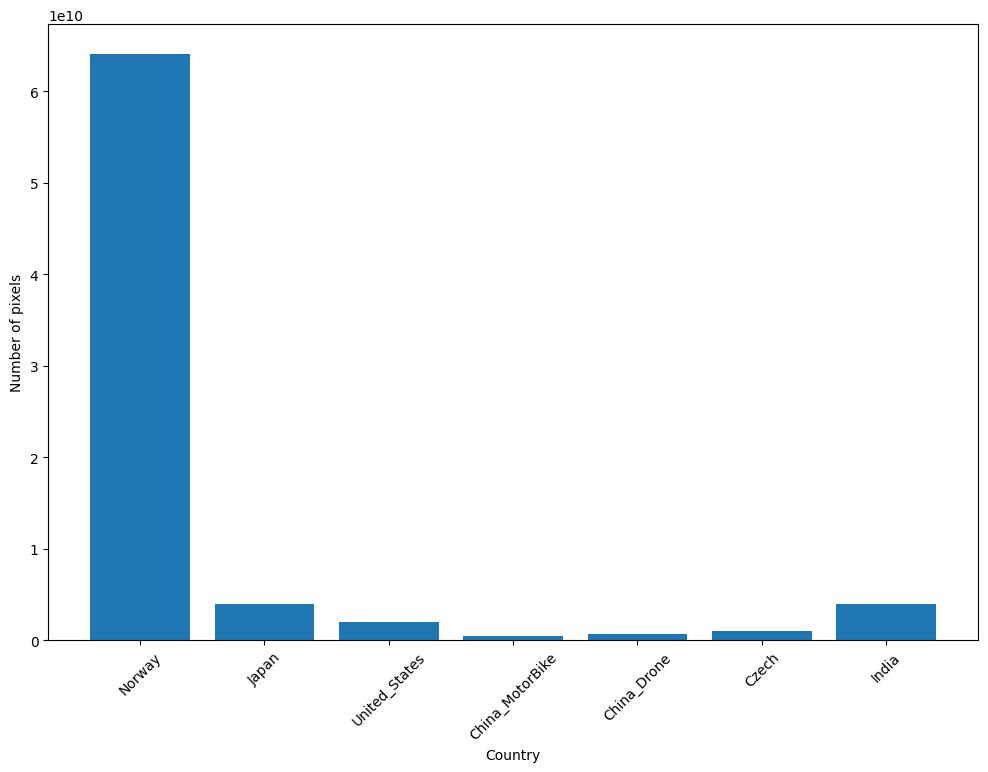

In [17]:
# plot number of pixels per country
plt.figure(figsize=(12, 8))
plt.bar(number_of_pixels_per_country.keys(), number_of_pixels_per_country.values())
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of pixels")
plt.show()